In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import CSV Data as Pandas DataFrame**


In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


check for null values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Check duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

Checking Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
num_features=[f for f in df.columns if df[f].dtype !='O']
cat_features=[f for f in df.columns if df[f].dtype =='O']

print("we have {} numerical features : {}".format(len(num_features),num_features))
print("\nWe have {} categorical features : {}".format(len(cat_features),cat_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for Total Score and Average

In [11]:
df['total_score']=df[num_features].sum(axis=1)
df['average_score']=df[num_features].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()

print("Number of students who scored full marks in math: ",math_full)
print("Number of students who scored full marks in reading: ",reading_full)
print("Number of students who scored full marks in writing: ",writing_full) 

Number of students who scored full marks in math:  7
Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14


In [13]:
raeding_less_20=df[df['reading_score']<=20]['average_score'].count()
writing_less_20=df[df['writing_score']<=20]['average_score'].count()
math_less_20=df[df['math_score']<=20]['average_score'].count()

print("Number of students who scored less than or equal to 20 in math: ",math_less_20)
print("Number of students who scored less than or equal to 20 in reading: ",raeding_less_20)
print("Number of students who scored less than or equal to 20 in writing: ",writing_less_20)

Number of students who scored less than or equal to 20 in math:  4
Number of students who scored less than or equal to 20 in reading:  1
Number of students who scored less than or equal to 20 in writing:  3


Insights

- From above values we get students have performed the worst in maths.
- Best performance is in reading section.

**Exploring Data**

- Visualize average score distribution to make some conclusion.
    - Histogram
    - Kernel Distribution function(KDE)

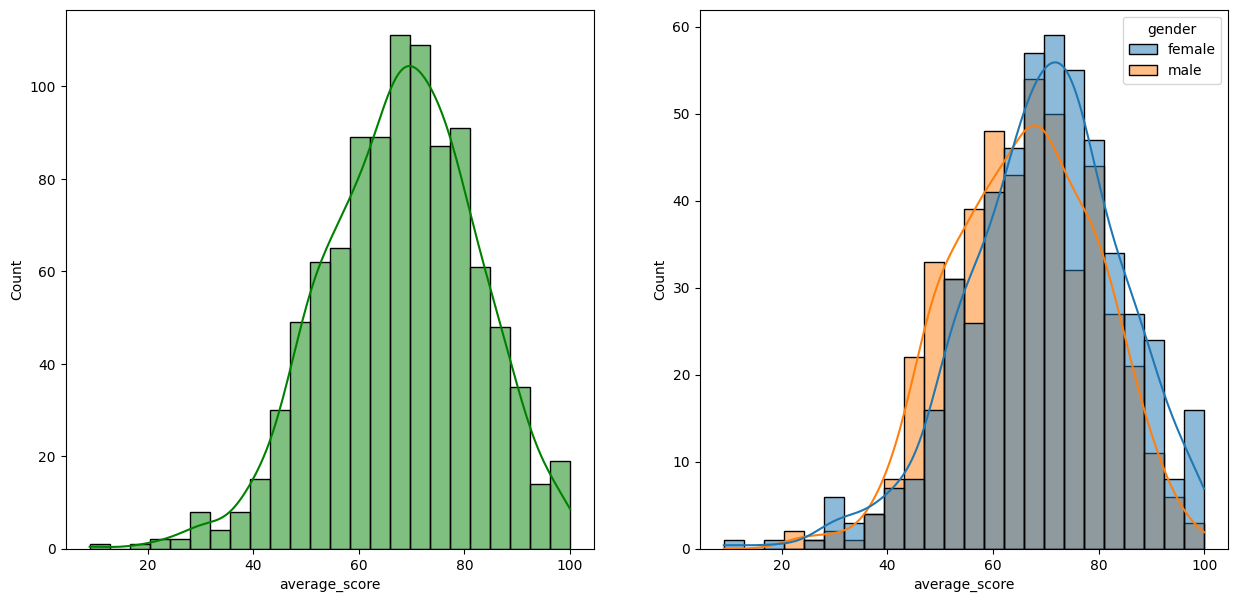

In [14]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

Insights

- Female students tend to perform well than male students.

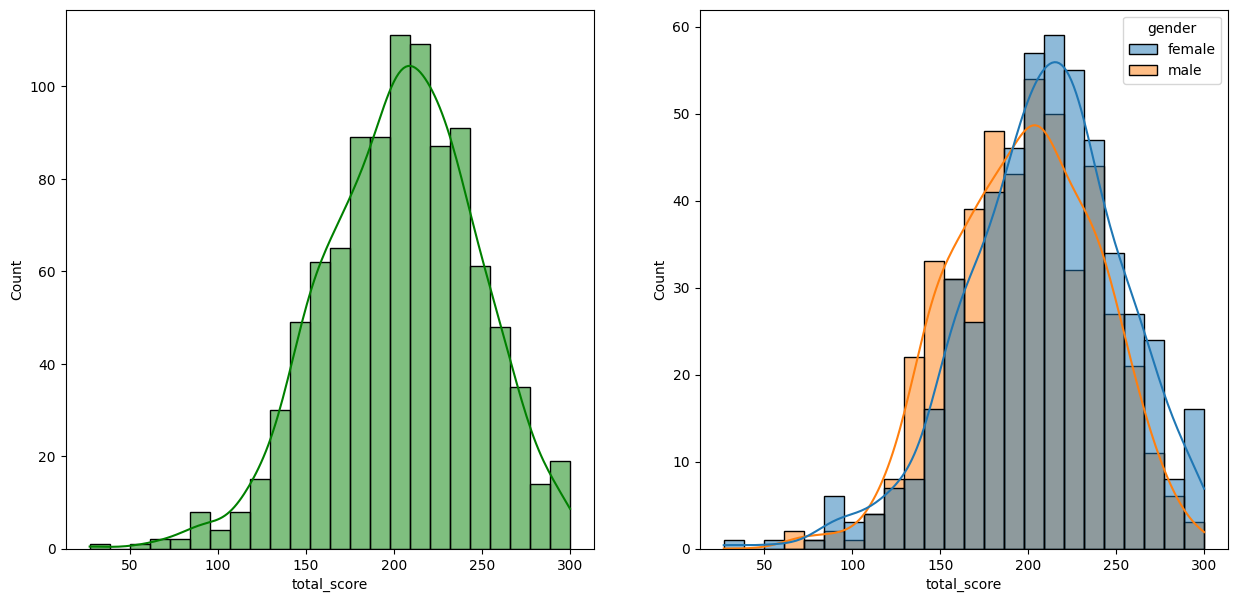

In [15]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

In [16]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

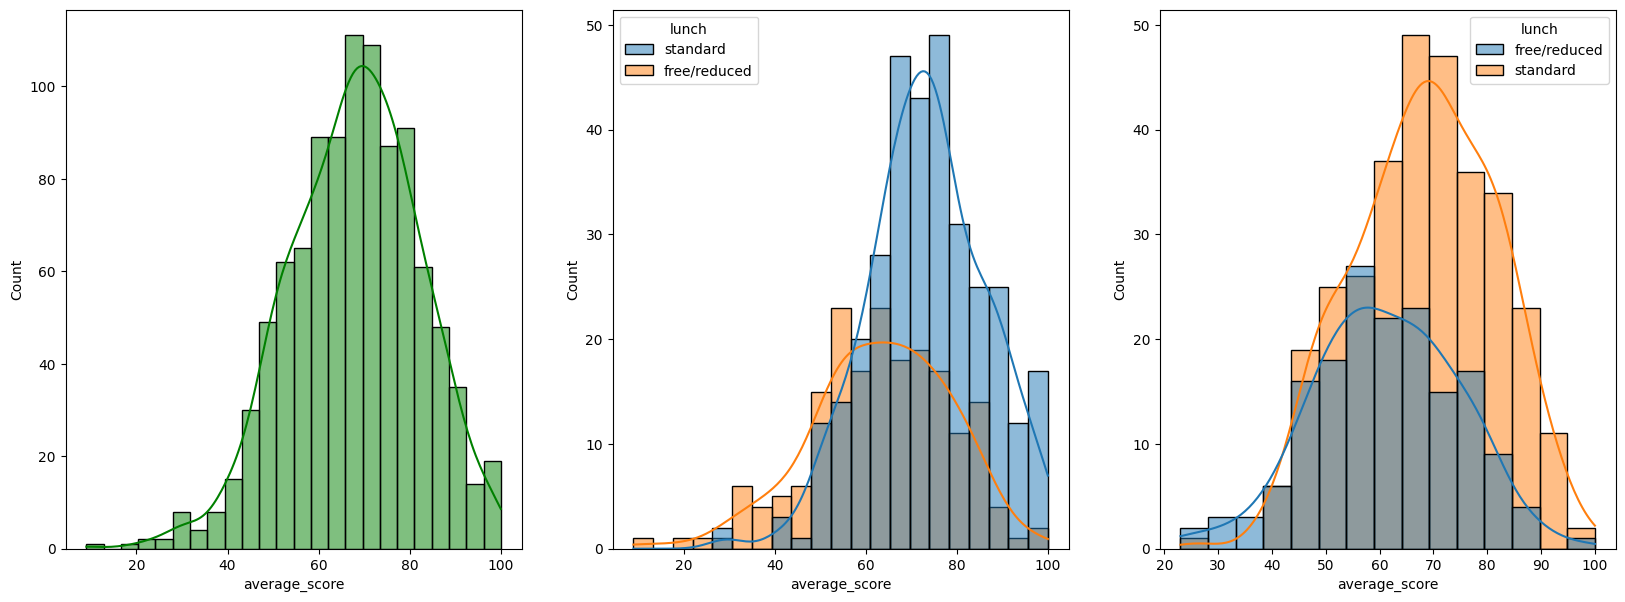

In [17]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
ax=sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.subplot(132)
ax=sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
ax=sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.show()


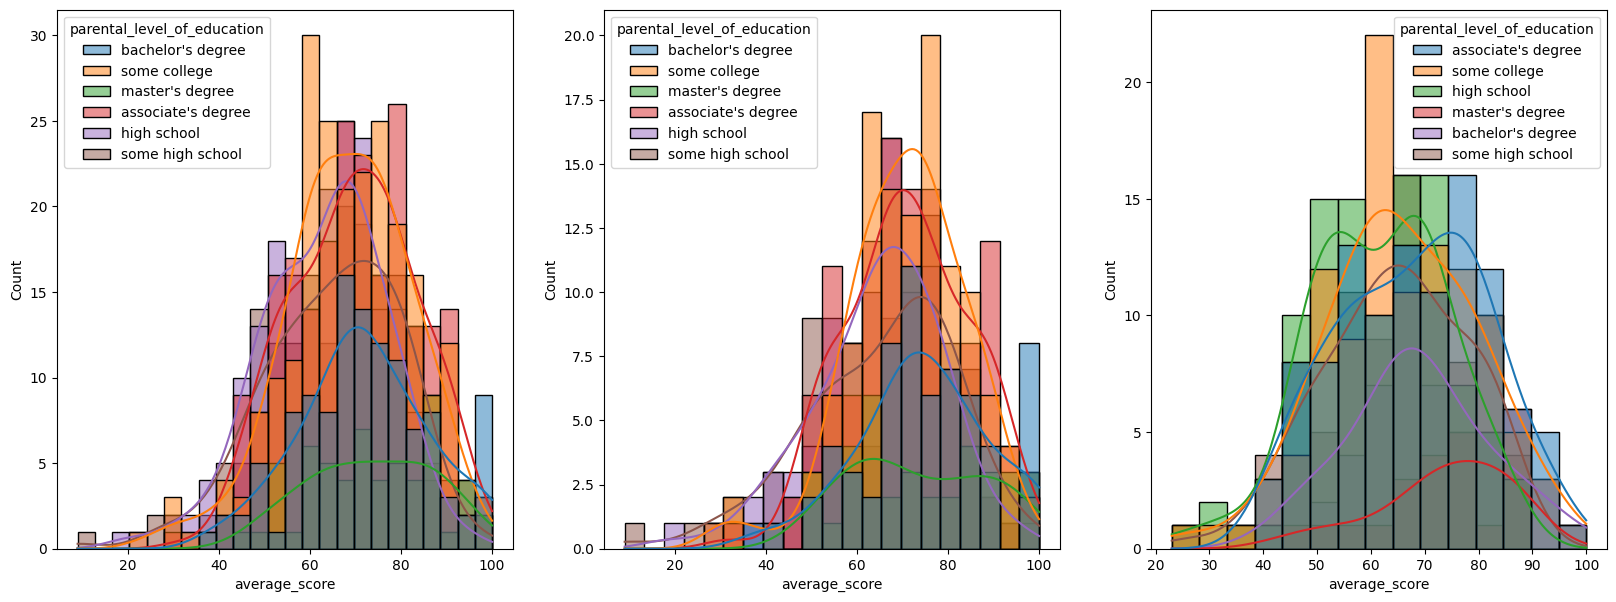

In [18]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
ax=sns.histplot(data=df,x='average_score',kde=True,color='g',hue='parental_level_of_education')
plt.subplot(132)
ax=sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax=sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

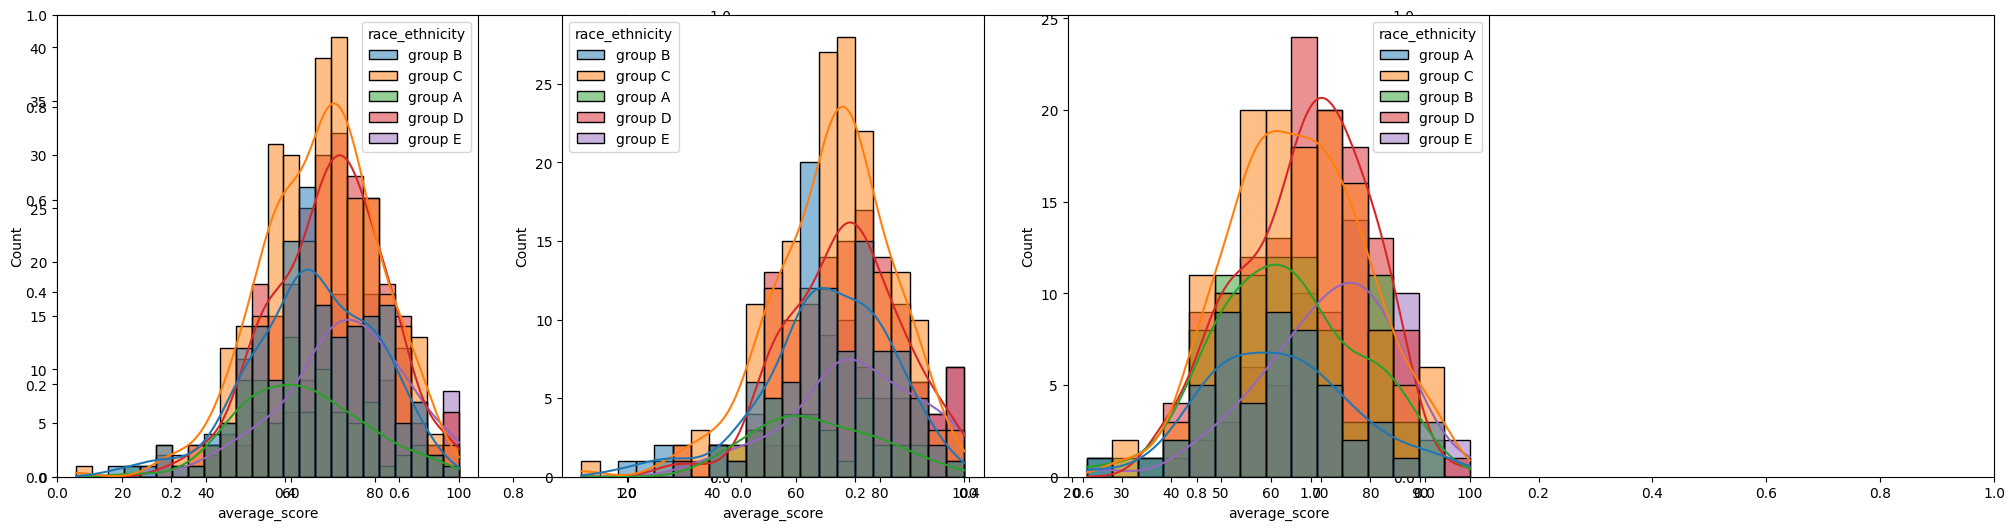

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

MAXIMUM MARKS IN ALL THREE SUBJECTS

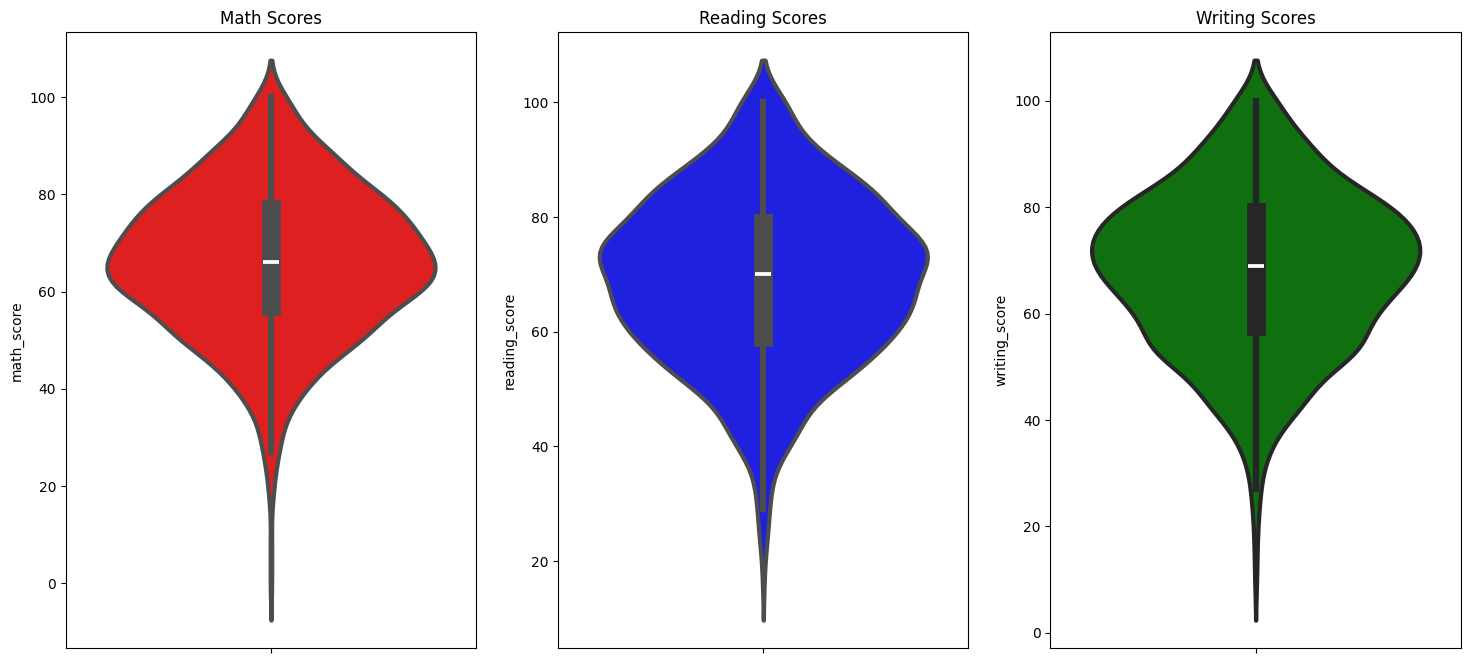

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.violinplot(data=df,y='reading_score',color='blue',linewidth=3)
plt.subplot(1,3,3)  
plt.title('Writing Scores')
sns.violinplot(data=df,y='writing_score',color='green',linewidth=3)
plt.show()

INSIGHT

- Maximum score of the students lie between 50-80.

In [21]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x212612eead0>,
 [Text(-0.4746018502673304, 0.9923472596439347, 'None'),
  Text(0.47460146383300333, -0.9923474444606439, 'Completed')],
 [Text(-0.25887373650945295, 0.5412803234421462, '64.20%'),
  Text(0.2588735257270927, -0.5412804242512602, '35.80%')])

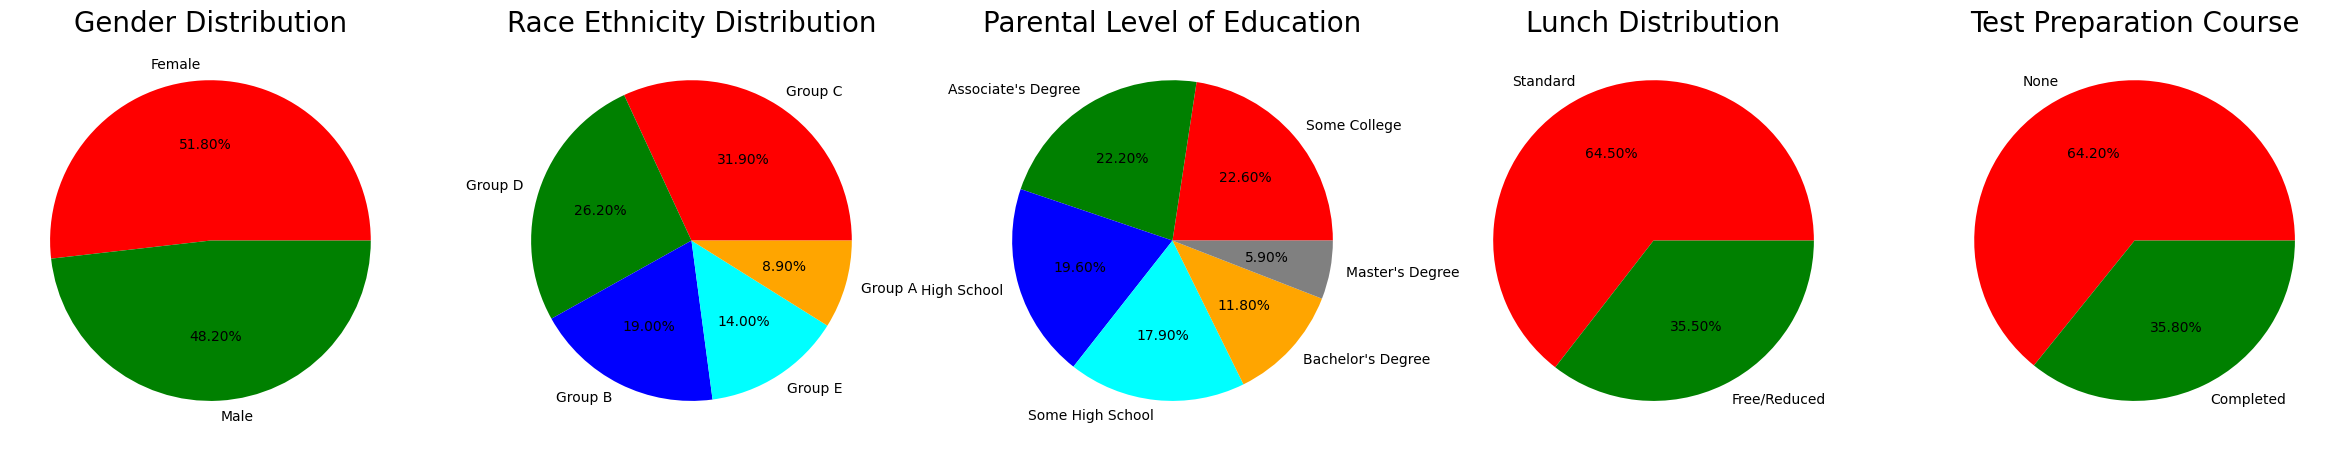

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
plt.title('Gender Distribution', fontsize=20)
size=df['gender'].value_counts()
labels='Female','Male'
color = ['red', 'green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')

plt.subplot(1,5,2)
plt.title('Race Ethnicity Distribution', fontsize=20)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']   
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')

plt.subplot(1,5,3)
plt.title('Parental Level of Education', fontsize=20)
size=df['parental_level_of_education'].value_counts()
labels= 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')

plt.subplot(1,5,4)
plt.title('Lunch Distribution', fontsize=20)
size = df['lunch'].value_counts()   
labels = 'Standard', 'Free/Reduced'
color = ['red','green'] 
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')

plt.subplot(1,5,5)
plt.title('Test Preparation Course', fontsize=20)
size = df['test_preparation_course'].value_counts() 
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')



#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

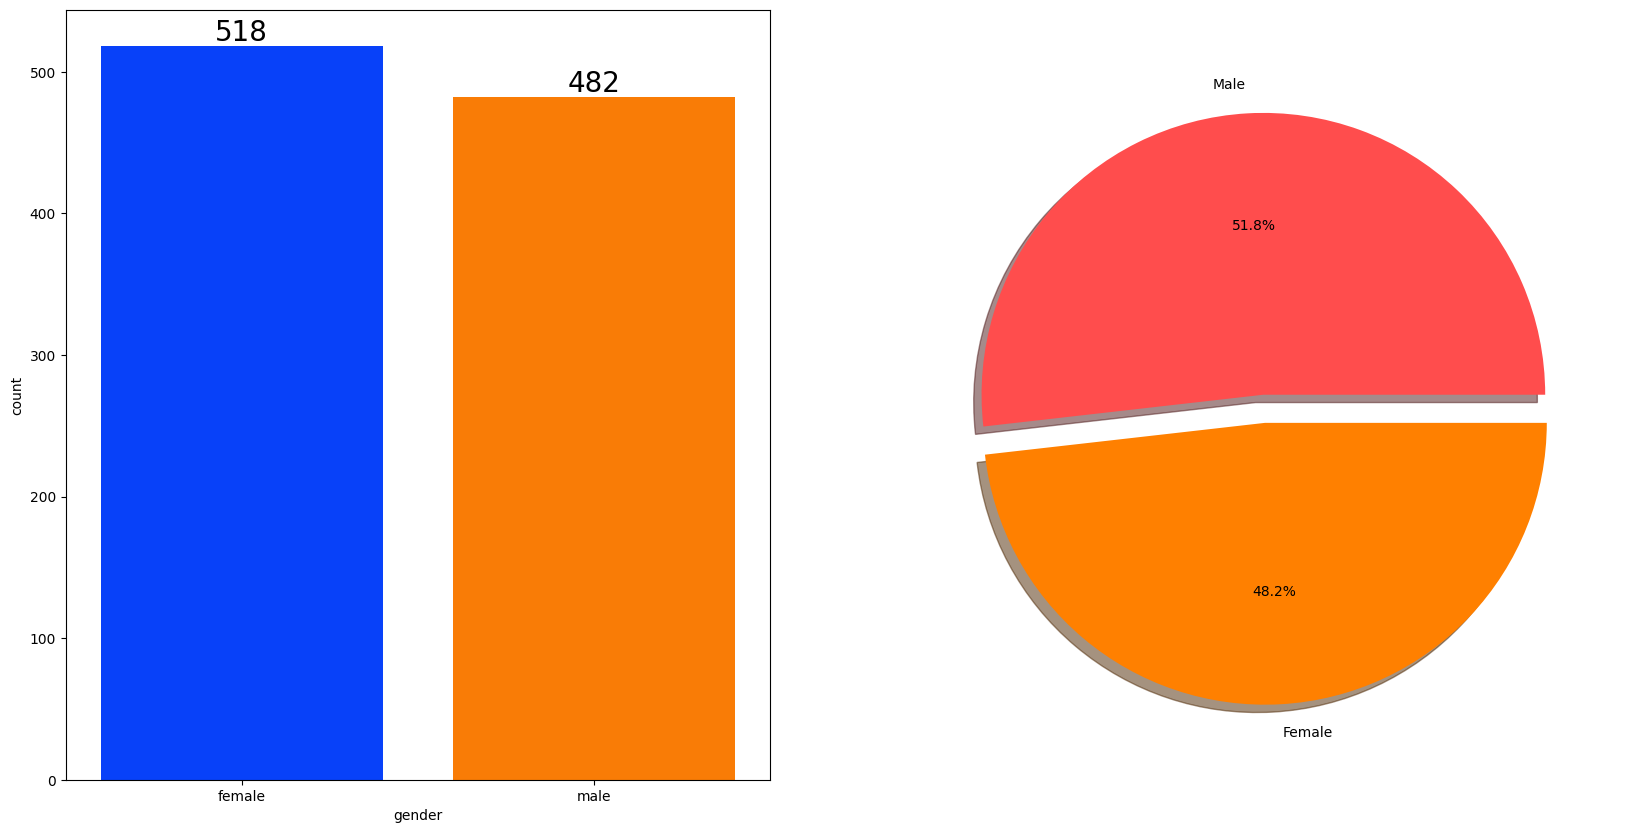

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [24]:
gender_grp= df.groupby('gender').mean(numeric_only=True)
gender_grp

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


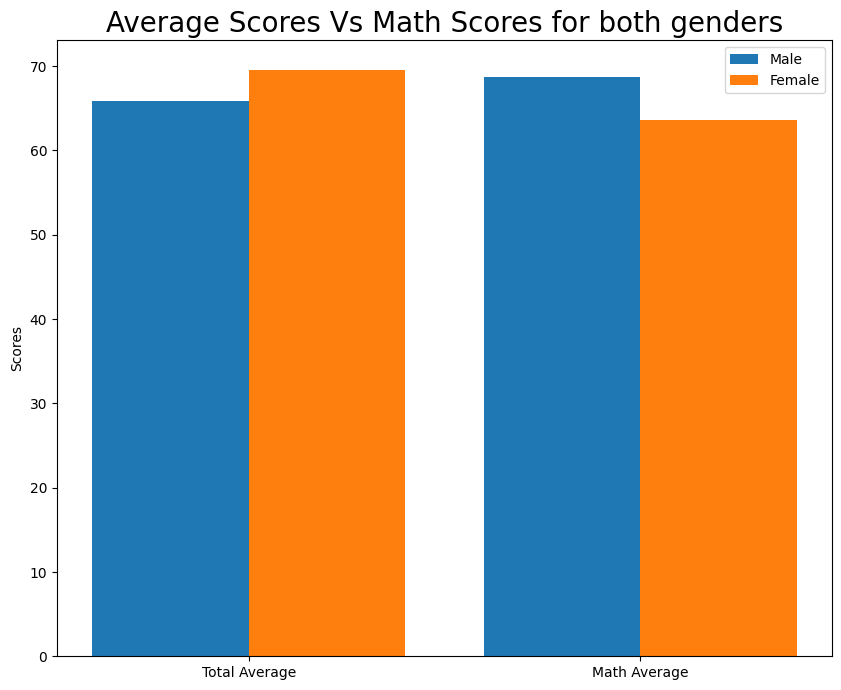

In [25]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_grp['average_score'][0],gender_grp['math_score'][0]]
male_scores=[gender_grp['average_score'][1],gender_grp['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Scores')
plt.title('Average Scores Vs Math Scores for both genders',fontsize=20)
plt.legend()
plt.show()



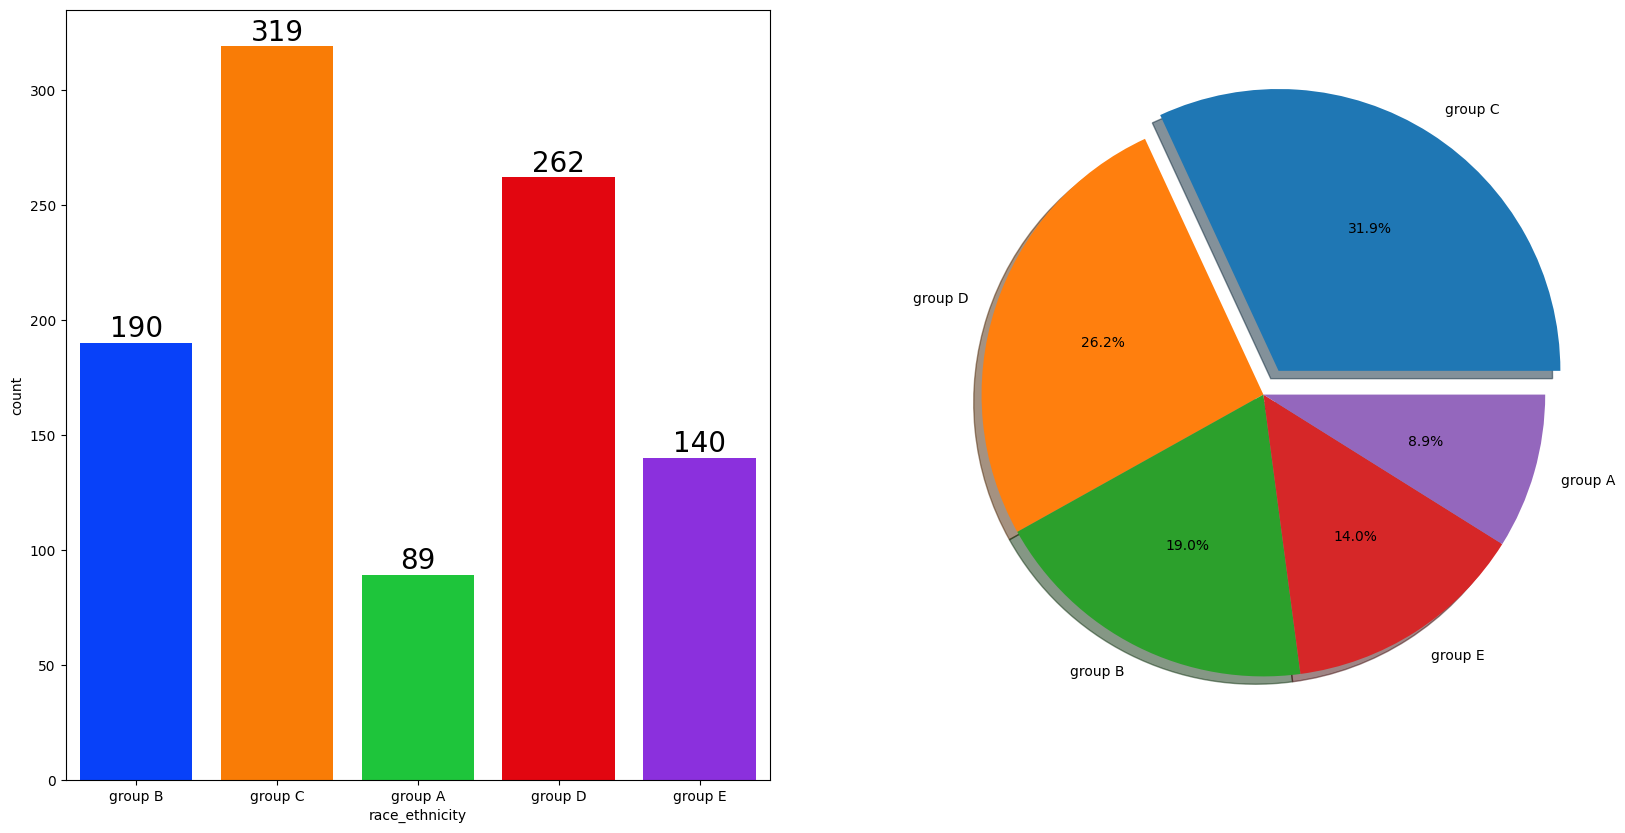

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

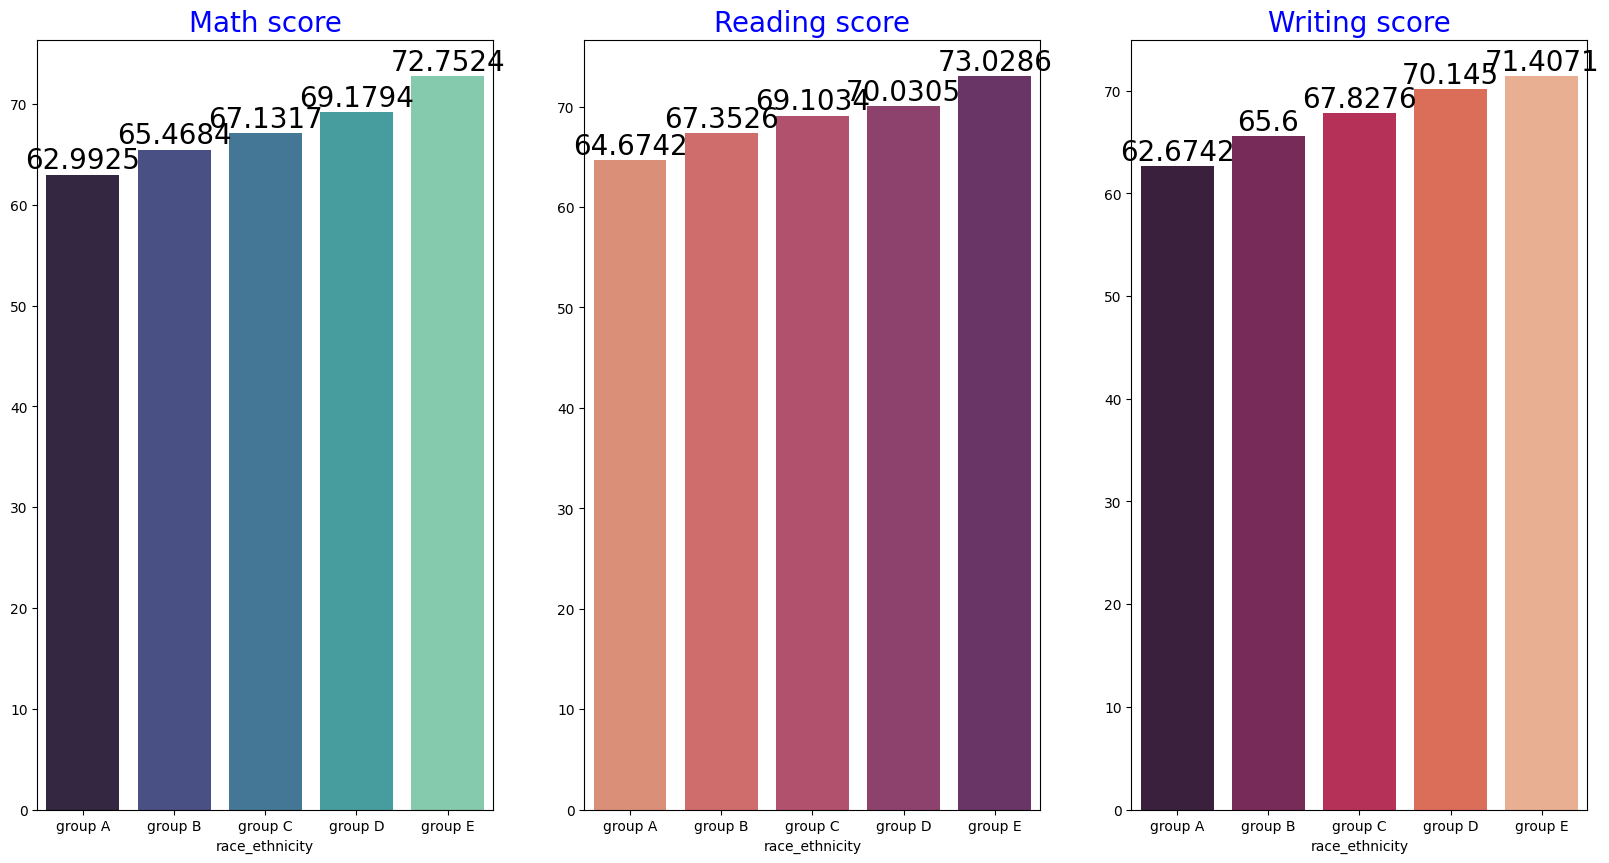

In [27]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['average_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='blue', fontsize=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='blue', fontsize=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='rocket',ax=ax[2])
ax[2].set_title('Writing score',color='blue', fontsize=20)  

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=20)

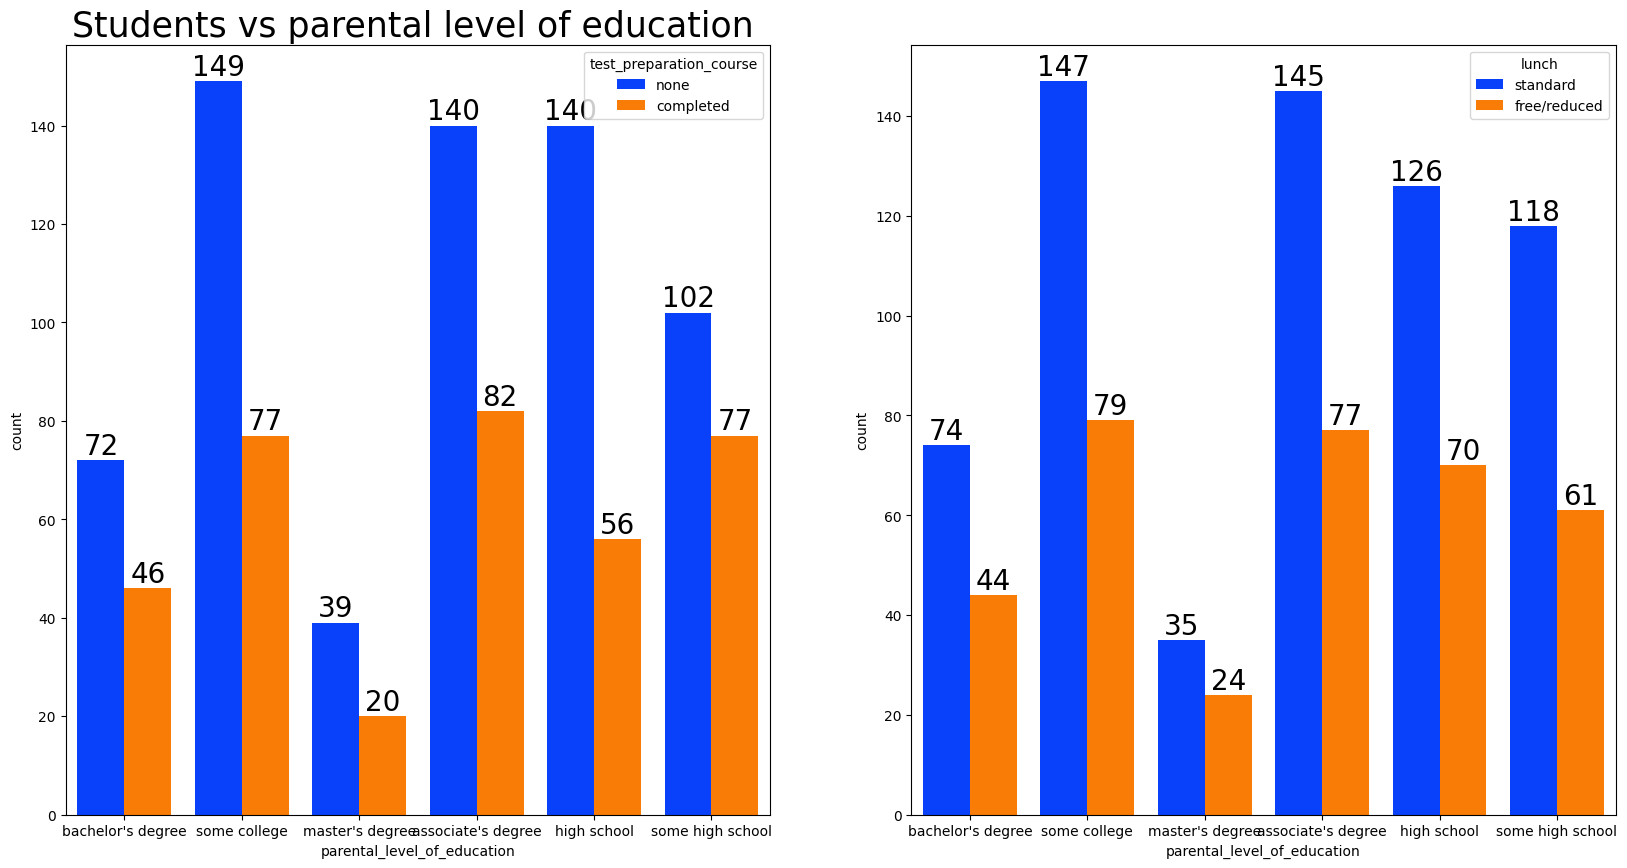

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',ax=ax[0],saturation=0.95)
ax[0].set_title('Students vs parental level of education ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

**Insight**
Students who get standard lunch tend to perform better than free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

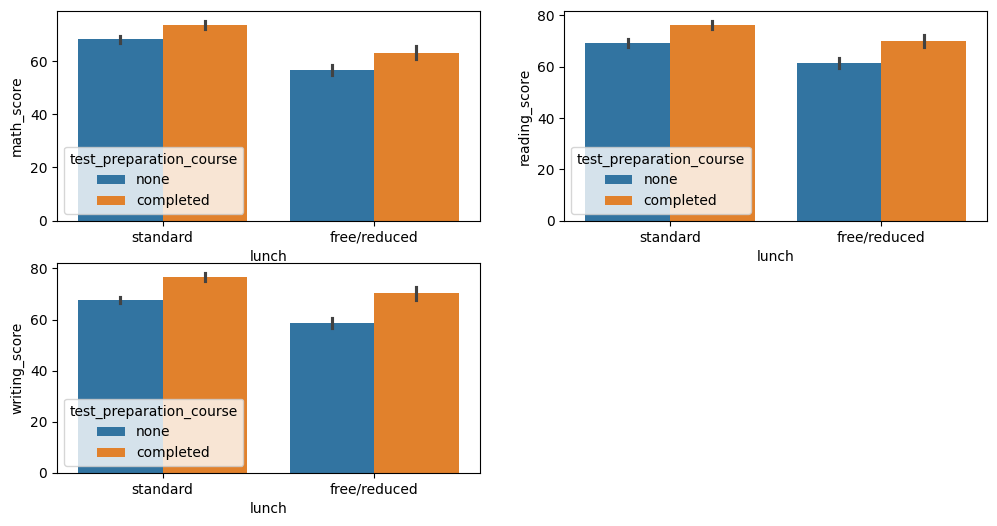

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])